<a href="https://colab.research.google.com/github/saumyamishra1211/saumyamishra1211/blob/main/Decision_tree_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Project.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#Bank data
#pridict whether thr customer will go the depositing the money plan
#11162 coustomer

In [ ]:
df.shape

(11162, 17)

# EDA

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='age'>

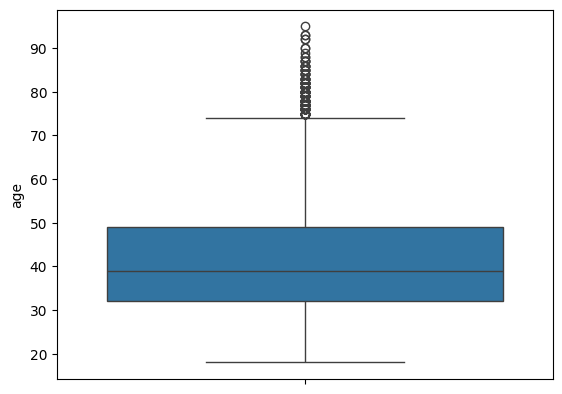

In [ ]:
sns.boxplot(df['age'])

<ipython-input-11-41ea37095166>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins= 50)


<Axes: xlabel='age', ylabel='Density'>

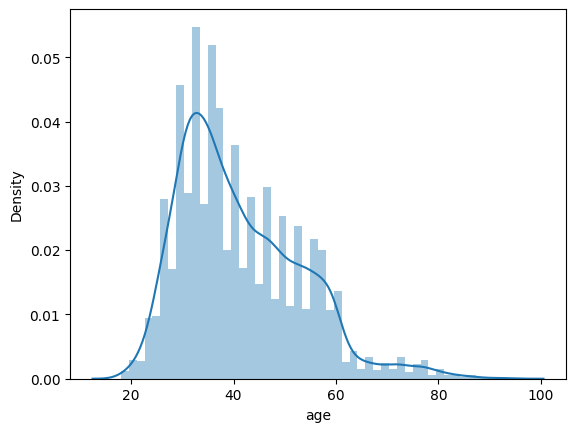

In [ ]:
sns.distplot(df['age'], bins= 50)

<Axes: >

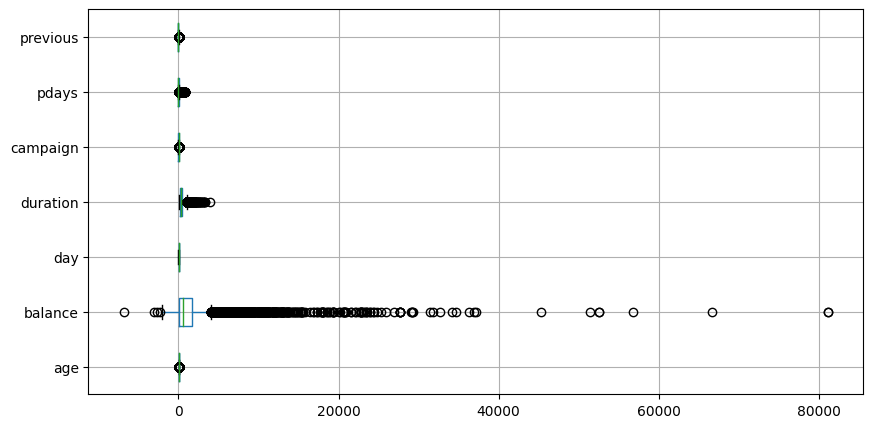

In [ ]:
plt.figure(figsize=(10,5))
df.boxplot(vert=False)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='duration'>

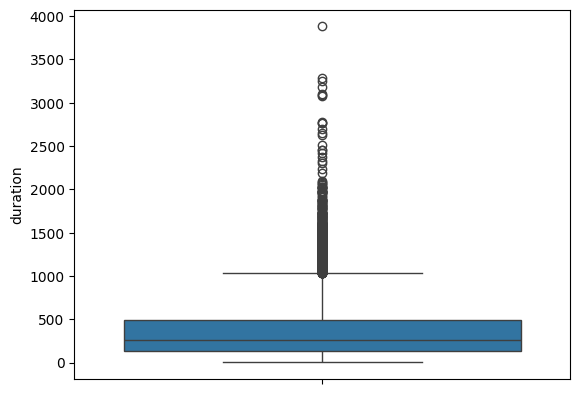

In [ ]:
sns.boxplot(df['duration'])

<ipython-input-14-40a0f8e2dd0a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'], bins=100)


<Axes: xlabel='duration', ylabel='Density'>

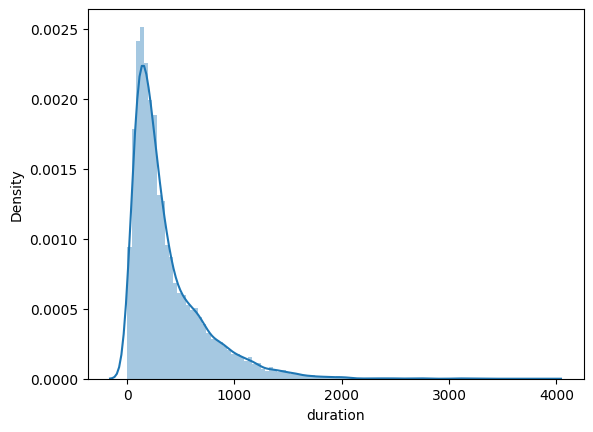

In [ ]:
sns.distplot(df['duration'], bins=100)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
df['job'].value_counts()

,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


In [ ]:
#converting job values into criteria
df['job'] = df['job'].replace(['management', 'admin.'], 'white-collar')
df['job'] = df['job'].replace(['services', 'housemaid'], 'Pink-collar')
df['job'] = df['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [ ]:
df['job'].value_counts()

,count
job,
white-collar,3900
blue-collar,1944
technician,1823
other,1565
Pink-collar,1197
self-employed,405
entrepreneur,328


In [ ]:
df['job'].value_counts()

,count
job,
white-collar,3900
blue-collar,1944
technician,1823
other,1565
Pink-collar,1197
self-employed,405
entrepreneur,328


In [ ]:
#we have contacted the customers

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,8326
failure,1228
success,1071
other,537


In [ ]:
df['poutcome'] = df['poutcome'].replace(['other'], 'unknown')

In [ ]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,8863
failure,1228
success,1071


In [ ]:
df.drop('contact', axis=1, inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.default.value_counts()


,count
default,
no,10994
yes,168


In [ ]:
#ENCOADING

In [ ]:
df['housing'].value_counts

<bound method IndexOpsMixin.value_counts of 0        yes
1         no
2        yes
3        yes
4         no
        ... 
11157    yes
11158     no
11159     no
11160     no
11161     no
Name: housing, Length: 11162, dtype: object>

In [ ]:
df.loan.value_counts()

,count
loan,
no,9702
yes,1460


In [ ]:
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})


In [ ]:
df.head()


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,0,45,0,0,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,0,2476,1,0,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,0,184,0,0,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.drop(['month', 'day'], axis=1, inplace=True)

In [ ]:
df.head()


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,0,45,0,0,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,0,2476,1,0,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,0,184,0,0,5,may,673,2,-1,0,unknown,yes


In [ ]:
df['pdays'].value_counts()

,count
pdays,
-1,8324
92,106
182,89
91,84
181,81
...,...
437,1
728,1
518,1


In [ ]:
print('customers that have not been contacted before:', len(df[df.pdays==-1]))
print('maximum values on "pdays":', df.pdays.max())

customers that have not been contacted before: 8324
maximum values on "pdays": 854


In [ ]:
df.loc[df['pdays'] == -1, 'pdays'] = 10000

In [ ]:
df['pdays'].value_counts()

,count
pdays,
10000,8324
92,106
182,89
91,84
181,81
...,...
437,1
728,1
518,1


In [ ]:
df['recent_pdays'] = np.where(df['pdays'], 1/df['pdays'], 1/df['pdays'])

In [ ]:
df.drop('pdays', axis=1, inplace=True)

In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,poutcome,deposit,recent_pdays
11157,33,blue-collar,single,primary,0,1,1,0,20,apr,257,1,0,unknown,no,0.000100
11158,39,Pink-collar,married,secondary,0,733,0,0,16,jun,83,4,0,unknown,no,0.000100
11159,32,technician,single,secondary,0,29,0,0,19,aug,156,2,0,unknown,no,0.000100
11160,43,technician,married,secondary,0,0,0,1,8,may,9,2,5,failure,no,0.005814
11161,34,technician,married,secondary,0,0,0,0,9,jul,628,1,0,unknown,no,0.000100


In [ ]:
df_with_dummies = pd.get_dummies(data= df, columns =['job','marital', 'education',  ' poutcome' ],
                                 prefix = ['job', 'marital', 'education',  ' poutcome'])
df_with_dummies.head()

KeyError: "[' poutcome'] not in index"